<a href="https://colab.research.google.com/github/Seeun1124/myrepo/blob/main/240321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics 카테고리 개요
1. Prob Distribution (확률 분포)
- 이산확률분포에는 베르누이, 이항, 다항 분포가 있음.
- 연속확률분포에는 균등, 정규, 베타, 감마, 스튜던트 t, 카이제곱, F, 디리클레, 다변량정규 분포로 나뉨.
2. Descriptive Statistics (기술 통계)

3. Normality test (정규성 검정)
4. Equal Var. test (등분산 검정)
5. Correlation Analysis (상관분석)
6. Reliablitity Analysis (신뢰도 분석)
7. Chi-square test (카이-제곱 검정)
8. Student's t-test (t-검정)
- One-sample t-test: 한 집단의 평균을 특정한 값과 비교하는 경우에 사용
- Independent two-sample t-test: 두 개의 독립된 집단의 평균을 비교하는 경우에 사용
- Paired samples t-test: 같은 집단에 대한 두 개의 관측값 간의 차이를 비교하는 데 사용.  
예를 들어, 한 연구자가 새로운 교육 방법의 효과를 검증하기 위해 같은 학생 그룹에 대해 교육 전후의 성적을 비교하는 경우에 사용
9. ANOVA
10. Factor Analysis (요인 분석)
11. Regression (회귀 분석)
- Simple linear regression
- Multiple linear regression
- Hierarchical lnear regression
- Moderated linear regression
- Mediated linear regression
- Dummmy variable linear regression
12. Logistic Regression (로지스틱 회귀 분석)

# Import

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [3]:
# Visual Python: Data Analysis > File
# train = pd.read_csv('./train.csv')
# train

In [4]:
# Visual Python: Data Analysis > File
# test = pd.read_csv('./test.csv')
# test

# 1. 확률 분포 (Prob Distribution) <해야됨>

# 2. 기술 통계 (Decriptive Statistics)

### Descriptive statistics

,Age,Survived
N Total,891.000,891.000
N Valid,714.000,891.000
N Missing,177.000,0.000
Mean,29.699,0.384
Sum,21205.170,342.000
Std. deviation,14.526,0.487
Variance,211.019,0.237
Percentile: 25,20.125,0.000
Percentile: 50,28.000,0.000
Percentile: 75,38.000,1.000


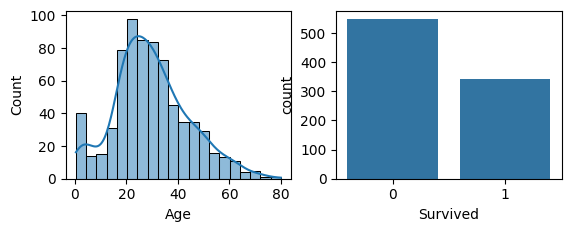

In [5]:
# Visual Python: Descriptive Statistics
vp_df = titanic[['Age', 'Survived']].copy()

# Descriptive statistics
from IPython.display import display, Markdown
display(Markdown('### Descriptive statistics'))
display(pd.DataFrame({
    'N Total':vp_df.shape[0],
    'N Valid':vp_df.count(numeric_only=True),
    'N Missing':vp_df.loc[:,vp_df.apply(pd.api.types.is_numeric_dtype)].isnull().sum(),
    'Mean':vp_df.mean(numeric_only=True),
    'Sum':vp_df.sum(numeric_only=True),
    'Std. deviation':vp_df.std(numeric_only=True),
    'Variance':vp_df.var(numeric_only=True),
    'Percentile: 25':vp_df.quantile(q=0.25, numeric_only=True),
    'Percentile: 50':vp_df.quantile(q=0.50, numeric_only=True),
    'Percentile: 75':vp_df.quantile(q=0.75, numeric_only=True),
}).round(3).T)

# Charts
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    # Histogram
    idx = 1
    for col in vp_df.columns:
        plt.subplot(2,2, idx)
        if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
            sns.histplot(data=vp_df, x=col, kde=True)
        else:
            sns.countplot(data=vp_df, x=col)

        if idx < 4:
            idx += 1
        else:
            idx = 1
            plt.tight_layout()
            plt.show()

# 3. 정규성 검정 (Normality test)

## Q-Q plot

- 연속 변수인 Age가 정규 분포를 따르는지 여부를 확인하기 위해 정규성 검정인 Shapiro-Wilk test를 수행

### Normality test (Shapiro-Wilk)

,Statistic,p-value
Normality test (Shapiro-Wilk),0.964178,0.000125


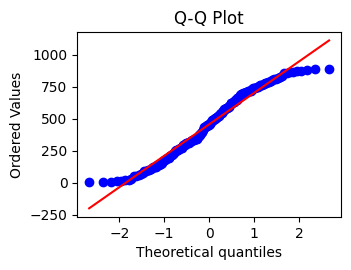

In [6]:
# Visual Python: Normality test
# Shapiro-Wilk test
vp_df = titanic.loc[(titanic['Age'].notnull()), ].dropna().copy()

# Normality test (Shapiro-Wilk)
from IPython.display import display, Markdown
from scipy import stats
_res = stats.shapiro(vp_df['PassengerId'])
display(Markdown('### Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Normality test (Shapiro-Wilk)']))

# Charts
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    plt.subplot(2,2,1)
    stats.probplot(vp_df['PassengerId'], plot=plt)
    plt.title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

-  검정 결과, p-value가 유의수준 0.05보다 작기 때문에 train 데이터는 정규 분포를 따른다는 귀무 가설을 채택한다.

# 4. 등분산 검정 (Equal Var. test)

- 성별(Sex)에 따른 나이대(Age)를 독립변수로, 생존여부(Survived)를 종속변수로 설정하여 Levene test 시행

성별이 male인 경우

,Variance
0,200.977987
1,306.470498


### Bartlett test

,Statistic,p-value
Equal Variance test (Bartlett),2.031831,0.154035


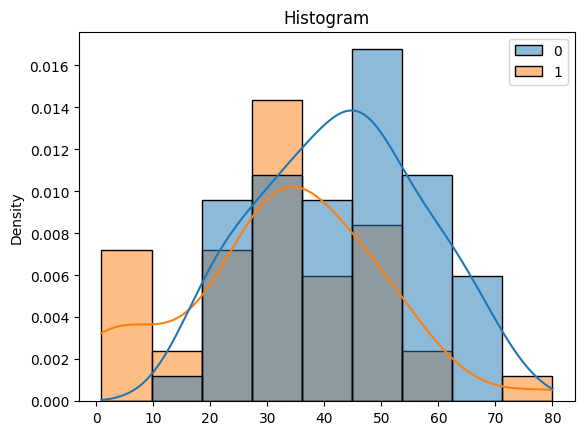

In [8]:
# Visual Python: Equal Var. test
# Bartlett test
vp_df = titanic.loc[(titanic['Sex'] == 'male'), ].dropna().copy()
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('Survived')['Age'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Variance
from IPython.display import display, Markdown
from scipy import stats
_dfr = _df.var().to_frame()
_dfr.columns = ['Variance']
display(_dfr)

# Bartlett test
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.bartlett(*_lst)
display(Markdown('### Bartlett test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},
                     index=['Equal Variance test (Bartlett)']))

# Histogram
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(_df, stat='density', kde=True)
    plt.title('Histogram')
    plt.show()

성별이 female인 경우

,Variance
0,537.100000
1,182.530902


### Levene test

,Statistic,p-value
Equal Variance test (Levene),3.983032,0.049125


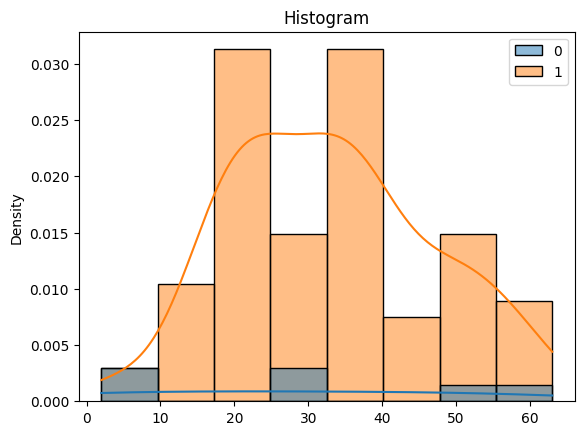

In [9]:
# Visual Python: Equal Var. test
# Levene test
vp_df = titanic.loc[(titanic['Sex'] == 'female'), ].dropna().copy()
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('Survived')['Age'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Variance
from IPython.display import display, Markdown
from scipy import stats
_dfr = _df.var().to_frame()
_dfr.columns = ['Variance']
display(_dfr)

# Levene test
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Levene test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},
                     index=['Equal Variance test (Levene)']))

# Histogram
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(_df, stat='density', kde=True)
    plt.title('Histogram')
    plt.show()

In [ ]:
# 해석은.... 추후에 추가...

# 5. 상관분석 (Correlation Analysis)

In [19]:
# Visual Python: Correlation Analysis
def vp_confidence_interval_corr(x, y, method='pearson', alpha=0.05):
    try: x=pd.Series(x); y=pd.Series(y)
    except: return np.nan

    corr_func = {'pearson':stats.pearsonr,'spearman':stats.spearmanr,'kendall':stats.kendalltau}
    se_diff   = {'pearson':3,'spearman':3,'kendall':4}
    se_func   = {'pearson': lambda corr: 1,
                 'spearman':lambda corr: 1 + corr ** 2 / 2.,
                 'kendall': lambda corr: .437 }

    corr, pvalue = corr_func[method](x,y)

    z  = np.log((1 + corr) / (1 - corr)) / 2
    se = np.sqrt(se_func[method](corr) / (x.size - se_diff[method]))

    z_lower = z - stats.norm.ppf(1 - alpha / 2.) * se
    z_upper = z + stats.norm.ppf(1 - alpha / 2.) * se

    corr_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    corr_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

    return corr, pvalue, corr_lower, corr_upper

In [20]:
# Visual Python: Correlation Analysis
vp_df = titanic[['Pclass', 'Fare']].dropna().copy()

# Correlation Analysis
from scipy import stats
from IPython.display import display, Markdown
_dfr = pd.DataFrame()
for i, col1 in enumerate(vp_df.columns):
    for j, col2 in enumerate(vp_df.columns):
        if i >= j: continue
        if pd.api.types.is_numeric_dtype(vp_df[col1]) and pd.api.types.is_numeric_dtype(vp_df[col2]):
            _res = vp_confidence_interval_corr(vp_df[col1], vp_df[col2], method='pearson')
            _df_t = pd.DataFrame(data={'Variable1':col1,'Variable2':col2,'N':vp_df[col1].size,'Correlation coefficient':_res[0],
                                   'p-value':_res[1],'Lower(95%)':_res[2],'Upper(95%)':_res[3]}, index=[0])
            _dfr = pd.concat([_dfr, _df_t]).reset_index(drop=True)
display(Markdown('### Correlation Analysis: Pearson'))
display(_dfr)

# Correlation matrix: Pearson
from IPython.display import display
display(vp_df.corr(method='pearson', numeric_only=True).round(2))

### Correlation Analysis: Pearson

,Variable1,Variable2,N,Correlation coefficient,p-value,Lower(95%),Upper(95%)
0,Pclass,Fare,891,-0.5495,1.967386e-71,-0.593749,-0.501937


,Pclass,Fare
Pclass,1.00,-0.55
Fare,-0.55,1.00


In [ ]:
# 네 개의 변수가 모두 생존여부와 상관관계가 없는디..?
# Fare와 Age도 상관계수가 0.1로 유의미한 상관관계 아님
# Pclass와 Fare가 그나마 상관계수가 더 높긴한데 -0.55라 그닥...

# 6. 신뢰도 분석 (Reliability Analysis) <해야됨>

In [ ]:
# Pclass, Age, Sex 등 변수들 간의 내적 일관성을 분석하기 위해 시행
# 근데 신뢰도 분석을 이 데이터에 적용할 수가 있나...?

# 7. 카이-제곱 검정

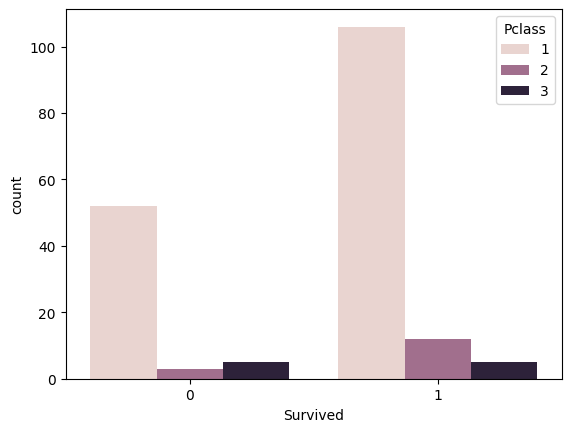

### Cross tabulation

Pclass                       1     2     3  Total
Survived                                         
0        Count            52.0   3.0   5.0   60.0
         Expected count   51.8   4.9   3.3   60.0
1        Count           106.0  12.0   5.0  123.0
         Expected count  106.2  10.1   6.7  123.0
Total    Count           158.0  15.0  10.0  183.0
         Expected count  158.0  15.0  10.0  183.0

### Chi-square test

,Value,df,p-value(two-sided)
Pearson Chi-square,2.458550,2.0,0.292504
Likelihood ratio,2.476621,2.0,0.289874
N of valid cases,183.000000,NaN,NaN


### Cramers V coefficient

,Value
Cramers V coefficient,0.115908


In [29]:
# Visual Python: Chi-square test
vp_df = titanic.dropna().copy()

# Count plot
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.countplot(data=vp_df, x='Survived', hue='Pclass')
    plt.show()

# Chi-square test of independence
from IPython.display import display, Markdown
from scipy import stats
_obs  = pd.crosstab(index=vp_df['Survived'], columns=vp_df['Pclass'])
_res1 = stats.chi2_contingency(_obs)
_res2 = stats.chi2_contingency(_obs, lambda_='log-likelihood')

# Cross tabulation: Count
_dfc = pd.crosstab(index=vp_df['Survived'],columns=vp_df['Pclass'],margins=True,margins_name='Total')
_dfc = _dfc.reset_index().reset_index()
_dfc[' '] = 'Count'

# Cross tabulation: Expected count
_dfe = pd.DataFrame(_res1.expected_freq, index=_obs.index, columns=_obs.columns).round(1)
_dfe.loc['Total',:] = _dfe.sum(axis=0)
_dfe.loc[:,'Total'] = _dfe.sum(axis=1)
_dfe = _dfe.reset_index().reset_index()
_dfe[' '] = 'Expected count'

# Cross tabulation: Count + Expected count
display(Markdown('### Cross tabulation'))
display(pd.concat([_dfc, _dfe]).set_index(['Survived',' ']).sort_values('index').drop('index',axis=1))

# Chi-square test
display(Markdown('### Chi-square test'))
display(pd.DataFrame(data = {'Value':[_res1.statistic,_res2.statistic,vp_df.dropna().shape[0]],
                             'df':[_res1.dof,_res2.dof,np.nan],
                             'p-value(two-sided)':[_res1.pvalue,_res2.pvalue,np.nan]},
                     index= ['Pearson Chi-square','Likelihood ratio','N of valid cases']))

# Cramers' V coefficient
_X2 = stats.chi2_contingency(_obs)[0]
_sum = _obs.sum().sum()
_minDim = min(_obs.shape)-1
display(Markdown('### Cramers V coefficient'))
display(pd.DataFrame(data={'Value':np.sqrt((_X2/_sum) / _minDim)}, index=['Cramers V coefficient']))

귀무가설: 생존자와 클래스와의 관계가 없다.  
대립가설: 생존자와 클래스와의 관계가 있다.  
p-value가 유의수준보다 높아 귀무가설을 기각하지 못 한다. 따라서 생존자와 클래스와의 관계는 없다.

# 8. t-검정

`-` one sample t-test  
생존율이 0.5이 되는지 확인하기 위해 데이터의 생존여부 변수를 확인하여 비교 (임의로 비교값을 0.5로 설정)  
- 귀무가설: 집단의 평균이 0.5와 같다.
- 대립가설: 집단의 평균이 0.5와 다르다.

In [48]:
# Visual Python: Student's t-test
# One-sample t-test
vp_df = titanic.dropna().copy()

# Normality test (Shapiro-Wilk)
from IPython.display import display, Markdown
from scipy import stats
_res = stats.shapiro(vp_df['Survived'])
display(Markdown('### Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Normality test (Shapiro-Wilk)']))

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'N':vp_df['Survived'].size,'Mean':vp_df['Survived'].mean(),
                           'Std. Deviation':vp_df['Survived'].std(),
                           'Std. Error Mean':vp_df['Survived'].std()/np.sqrt(vp_df['Survived'].size)},
                     index=['Statistics']))

# One-sample t-test
_res = stats.ttest_1samp(vp_df['Survived'], popmean=0.5, alternative='two-sided')
_lower, _upper = _res.confidence_interval(confidence_level=0.95)
display(Markdown('### One-sample t-test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'dof':_res.df,'Alternative':'two-sided',
                           'p-value':_res.pvalue,'Test Value':0.5,'Mean difference':vp_df['Survived'].mean()-0.5,
                           'Confidence interval':0.95,'Lower':_lower,'Upper':_upper},
                     index=['One-sample t-test']))

### Normality test (Shapiro-Wilk)

,Statistic,p-value
Normality test (Shapiro-Wilk),0.59181,1.288309e-20


### Statistics

,N,Mean,Std. Deviation,Std. Error Mean
Statistics,183,0.672131,0.470725,0.034797


### One-sample t-test

,Statistic,dof,Alternative,p-value,Test Value,Mean difference,Confidence interval,Lower,Upper
One-sample t-test,4.946728,182,two-sided,0.000002,0.5,0.172131,0.95,0.603474,0.740788


`-` Independent two sample t-test  
남성과 여성 간의 생존 여부를 확인하는 독립 쌍표본 검정 수행 (그룹1은 남성, 그룹2는 여성)  
- 귀무가설: 남성과 여성의 생존율은 같다.
- 대립가설: 남성과 여성의 생존율은 같지 않다.

In [60]:
# Visual Python: Student's t-test
# Independent two-sample t-test
vp_df1 = titanic[(titanic['Sex'] == 'male')]['Survived'].dropna().copy()
vp_df2 = titanic[(titanic['Sex'] == 'female')]['Survived'].dropna().copy()

# Normality test (Shapiro-Wilk)
from IPython.display import display, Markdown
from scipy import stats
_res1 = stats.shapiro(vp_df1)
_res2 = stats.shapiro(vp_df2)
display(Markdown('### Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':[_res1.statistic,_res2.statistic],'p-value':[_res1.pvalue,_res2.pvalue]},
                    index=[['Normality test (Shapiro-Wilk)' for i in range(2)],['Variable1','Variable2']]))

# Equal Variance test (Levene)
display(Markdown('### Equal Variance test (Levene)'))
_res = stats.levene(vp_df1, vp_df2, center='mean')
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'N':[vp_df1.size,vp_df2.size],
                           'Mean':[vp_df1.mean(),vp_df2.mean()],
                           'Std. Deviation':[vp_df1.std(),vp_df2.std()],
                           'Std. Error mean':[vp_df1.std()/np.sqrt(vp_df1.size),
                                              vp_df2.std()/np.sqrt(vp_df2.size )]},
                     index=[['Statistics' for i in range(2)],['Variable1','Variable2']]))

# Independent two-sample t-test
_res1 = stats.ttest_ind(vp_df1, vp_df2, equal_var=True,  alternative='two-sided')
_res2 = stats.ttest_ind(vp_df1, vp_df2, equal_var=False, alternative='two-sided')
display(Markdown('### Independent two-sample t-test'))
display(pd.DataFrame(data={'Statistic':[_res1.statistic,_res2.statistic],'Alternative':['two-sided' for i in range(2)],
                           'p-value':[_res1.pvalue,_res2.pvalue],
                           'Mean difference':[vp_df1.mean()-vp_df2.mean() for i in range(2)]},
                     index=[['Independent two-sample t-test' for i in range(2)],['Equal variance' for i in range(2)],[True,False]]))
display(Markdown('If equal_var is False, perform Welch\'s t-test, which does not assume equal population variance'))

### Normality test (Shapiro-Wilk)

Statistic       p-value
Normality test (Shapiro-Wilk) Variable1   0.477060  6.322519e-38
                              Variable2   0.545004  9.380661e-28

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),21.836957,0.000003


### Statistics

N      Mean  Std. Deviation  Std. Error mean
Statistics Variable1  577  0.188908        0.391775          0.01631
           Variable2  314  0.742038        0.438211          0.02473

### Independent two-sample t-test

Statistic Alternative  \
Independent two-sample t-test Equal variance True  -19.297817   two-sided   
                                             False -18.671833   two-sided   

                                                         p-value  \
Independent two-sample t-test Equal variance True   1.406066e-69   
                                             False  2.283601e-61   

                                                    Mean difference  
Independent two-sample t-test Equal variance True          -0.55313  
                                             False         -0.55313

If equal_var is False, perform Welch's t-test, which does not assume equal population variance

p-value가 유의수준보다 낮기 때문에 귀무가설을 기각한다. 따라서 남성과 여성의 생존율은 같다.

## `-` Paired-samples t-test

# 9. ANOVA

`-` Pclass에 따른 생존 여부에 대한 ANOVA 분석을 시행  
- 귀무가설: Pclass에 따라 생존 여부의 차이가 없다.
- 대립가설: Pclass에 따라 생존 여부가 다르다.

In [69]:
# Visual Python: ANOVA
def vp_confidence_interval(var, confidence_level=0.95):
    try: sr = pd.Series(var)
    except: return np.nan
    return stats.t.interval(confidence_level, df=sr.count()-1, loc=sr.mean(), scale=sr.std() / np.sqrt(sr.count()) )
def vp_sem(var):
    try: sr = pd.Series(var)
    except: return np.nan
    return sr.std() / np.sqrt(sr.count())

### Statistics

,Count,Mean,Std. Deviation,Min,Max,Std. Error Mean,Confidence interval,Lower,Upper
0,60,1.216667,0.584885,1.0,3.0,0.075508,0.95,1.065575,1.367758
1,123,1.178862,0.479626,1.0,3.0,0.043246,0.95,1.093251,1.264472


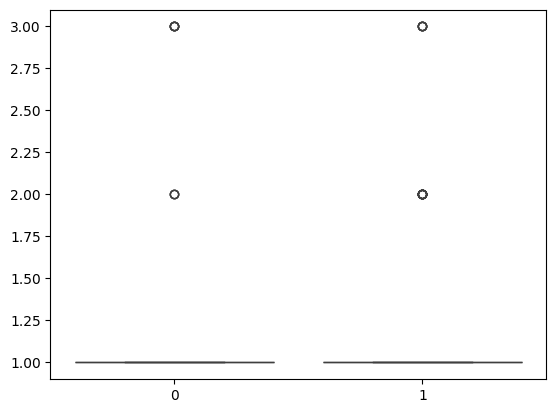

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),1.175773,0.27966


### One-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(Survived),1.0,0.057637,0.057637,0.21622,0.642494
Residual,181.0,48.248374,0.266566,NaN,NaN
Total,182.0,48.306011,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0378,0.6425,-0.1982,0.1226,False


In [70]:
# Visual Python: ANOVA
# One-way ANOVA
vp_df = titanic.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('Survived')['Pclass'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                           'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                           'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Boxplot
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.boxplot(data=_df)
    plt.show()

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# One-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('Pclass ~ C(Survived)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### One-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['Pclass'], vp_df['Survived']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

p-value가 유의수준보다 높으므로 귀무가설을 기각하지 못 한다. 따라서 Pclass에 따른 생존 여부에 유의한 차이가 없다.

# 10. 요인 분석 <해야됨>

# 11. 회귀 분석

`-` Simple linear regression  
독립변수를 객실 등급(Pclass), 종속변수를 운임 요금(Fare)으로 설정하여 운임 요금을 예측하는 회귀 분석 수행

### Model - Dependent variable ~ Independent variable

                            OLS Regression Results                            
Dep. Variable:                 Pclass   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     19.97
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           1.38e-05
Time:                        07:00:25   Log-Likelihood:                -128.22
No. Observations:                 183   AIC:                             260.4
Df Residuals:                     181   BIC:                             266.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3586      0.052     26.069      0.0

,coef,std err,t,P>|t|,[0.025,0.975],Tolerance,VIF
,,,,,,,,
Intercept,1.3586,0.052,26.069,0.000,1.256,1.461,NaN,NaN
Fare,-0.0021,0.000,-4.469,0.000,-0.003,-0.001,1.0,1.0


### Residual

,predict,residual,predict_z,residual_z
1,1.206996,-0.206996,0.097180,-0.424536
3,1.245675,-0.245675,0.335997,-0.503865
6,1.248308,-0.248308,0.352250,-0.509263
10,1.323104,1.676896,0.814070,3.439209
11,1.302152,-0.302152,0.684702,-0.619694
...,...,...,...,...
871,1.246836,-0.246836,0.343166,-0.506246
872,1.347992,-0.347992,0.967737,-0.713711
879,1.181736,-0.181736,-0.058785,-0.372729
887,1.294813,-0.294813,0.639390,-0.604643


### Residual Normality test (Shapiro-Wilk)

,Statistic,p-value
Resisual Normality test (Shapiro-Wilk),0.619333,5.664654e-20


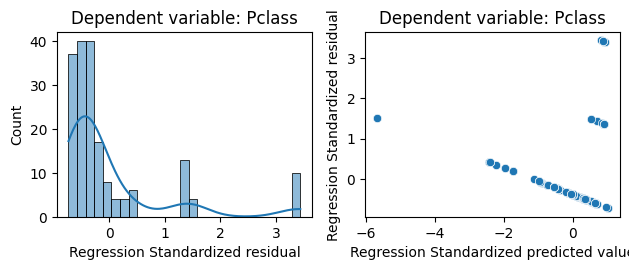

In [105]:
# Visual Python: Regression
# Simple linear regression
vp_df = titanic.dropna().copy()

# Simple linear regression
from IPython.display import display, Markdown
import statsmodels.formula.api as smf
# Model - Dependent variable ~ Independent variable
_model  = smf.ols('Pclass ~ Fare', vp_df)
_result = _model.fit()
display(Markdown('### Model - Dependent variable ~ Independent variable'))
print(_result.summary())

# Multi-collinearity statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
_dfr = pd.DataFrame(_result.summary().tables[1].data[1:],columns=_result.summary().tables[1].data[0]).set_index('')
for i, col in enumerate(_model.exog_names[1:]):
    _vif = variance_inflation_factor(_model.exog, i+1)
    _dfr.loc[col,'Tolerance'] = 1/_vif
    _dfr.loc[col,'VIF'] = _vif
display(_dfr)

# Residual
from IPython.display import display, Markdown
from scipy import stats
import statsmodels.api as sm
_predict  = _result.predict(vp_df)
_residual = _result.resid
vp_residual = pd.DataFrame({'predict':_predict,'residual':_residual,
                            'predict_z':stats.zscore(_predict),'residual_z':stats.zscore(_residual)})
display(Markdown('### Residual'))
display(vp_residual)

# Resisual Normality test (Shapiro-Wilk)
_res = stats.shapiro(vp_residual['residual_z'])
display(Markdown('### Residual Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Resisual Normality test (Shapiro-Wilk)']))

import seaborn as sns
import warnings
with warnings.catch_warnings():

    # Residual histogram
    plt.subplot(2,2,1)
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(data=vp_residual, x='residual_z', kde=True)
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized residual')

    # Residual scatterplot
    plt.subplot(2,2,2)
    sns.scatterplot(data=vp_residual, x='predict_z', y='residual_z')
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized predicted value')
    plt.ylabel('Regression Standardized residual')

    plt.tight_layout()
    plt.show()

`-` Multiple linear regression

In [142]:
# 분석 시행 전 성별을 원-핫 인코딩
titanic['Sex'] = [1 if i=='female' else 0 for i in titanic['Sex']]

### Model - Dependent variable ~ Independent variable

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     14.38
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           2.57e-13
Time:                        07:28:39   Log-Likelihood:                -84.772
No. Observations:                 183   AIC:                             183.5
Df Residuals:                     176   BIC:                             206.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7792      0.146      5.343      0.0

### Residual

,predict,residual,predict_z,residual_z
1,0.953154,0.046846,1.043702,0.121823
3,0.966521,0.033479,1.093346,0.087062
6,0.361611,-0.361611,-1.153253,-0.940369
10,0.908927,0.091073,0.879447,0.236834
11,0.796082,0.203918,0.460345,0.530289
...,...,...,...,...
871,0.828371,0.171629,0.580266,0.446321
872,0.480362,-0.480362,-0.712217,-1.249182
879,0.764780,0.235220,0.344093,0.611689
887,1.044954,-0.044954,1.384640,-0.116902


### Residual Normality test (Shapiro-Wilk)

,Statistic,p-value
Resisual Normality test (Shapiro-Wilk),0.973346,0.001418


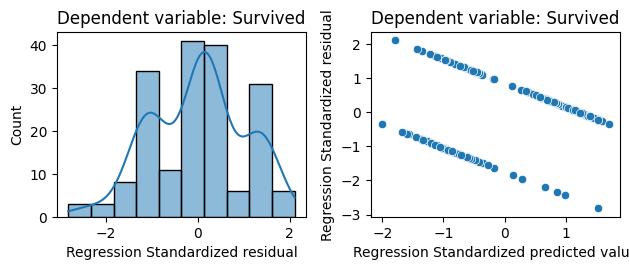

In [145]:
# Visual Python: Regression
# Multiple linear regression > Method: Enter
vp_df = titanic.dropna().copy()

# Model - Dependent variable ~ Independent variable
from IPython.display import display, Markdown
import statsmodels.formula.api as smf
_model  = smf.ols('Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare', vp_df)
_result = _model.fit()
display(Markdown('### Model - Dependent variable ~ Independent variable'))
print(_result.summary())

# Residual
from IPython.display import display, Markdown
from scipy import stats
import statsmodels.api as sm
_predict  = _result.predict(vp_df)
_residual = _result.resid
vp_residual = pd.DataFrame({'predict':_predict,'residual':_residual,
                            'predict_z':stats.zscore(_predict),'residual_z':stats.zscore(_residual)})
display(Markdown('### Residual'))
display(vp_residual)

# Resisual Normality test (Shapiro-Wilk)
_res = stats.shapiro(vp_residual['residual_z'])
display(Markdown('### Residual Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Resisual Normality test (Shapiro-Wilk)']))

import seaborn as sns
import warnings
with warnings.catch_warnings():

    # Residual histogram
    plt.subplot(2,2,1)
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(data=vp_residual, x='residual_z', kde=True)
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized residual')

    # Residual scatterplot
    plt.subplot(2,2,2)
    sns.scatterplot(data=vp_residual, x='predict_z', y='residual_z')
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized predicted value')
    plt.ylabel('Regression Standardized residual')

    plt.tight_layout()
    plt.show()

### Model - Dependent variable ~ Independent variable

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     28.23
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           5.36e-15
Time:                        07:28:55   Log-Likelihood:                -85.826
No. Observations:                 183   AIC:                             179.7
Df Residuals:                     179   BIC:                             192.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7865      0.124      6.346      0.0

### Residual

,predict,residual,predict_z,residual_z
1,0.923493,0.076507,0.944775,0.197813
3,0.941331,0.058669,1.011820,0.151692
6,0.357330,-0.357330,-1.183220,-0.923898
10,0.909542,0.090458,0.892338,0.233884
11,0.804575,0.195425,0.497807,0.505283
...,...,...,...,...
871,0.869980,0.130020,0.743640,0.336174
872,0.482194,-0.482194,-0.713903,-1.246742
879,0.816467,0.183533,0.542504,0.474536
887,1.036465,-0.036465,1.369395,-0.094283


### Residual Normality test (Shapiro-Wilk)

,Statistic,p-value
Resisual Normality test (Shapiro-Wilk),0.967585,0.000298


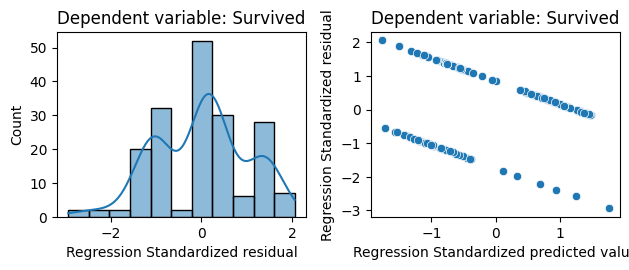

In [146]:
# Visual Python: Regression
# Multiple linear regression > Method: Enter
vp_df = titanic.dropna().copy()

# Model - Dependent variable ~ Independent variable
from IPython.display import display, Markdown
import statsmodels.formula.api as smf
_model  = smf.ols('Survived ~ Pclass + Sex + Age', vp_df)
_result = _model.fit()
display(Markdown('### Model - Dependent variable ~ Independent variable'))
print(_result.summary())

# Residual
from IPython.display import display, Markdown
from scipy import stats
import statsmodels.api as sm
_predict  = _result.predict(vp_df)
_residual = _result.resid
vp_residual = pd.DataFrame({'predict':_predict,'residual':_residual,
                            'predict_z':stats.zscore(_predict),'residual_z':stats.zscore(_residual)})
display(Markdown('### Residual'))
display(vp_residual)

# Resisual Normality test (Shapiro-Wilk)
_res = stats.shapiro(vp_residual['residual_z'])
display(Markdown('### Residual Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Resisual Normality test (Shapiro-Wilk)']))

import seaborn as sns
import warnings
with warnings.catch_warnings():

    # Residual histogram
    plt.subplot(2,2,1)
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(data=vp_residual, x='residual_z', kde=True)
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized residual')

    # Residual scatterplot
    plt.subplot(2,2,2)
    sns.scatterplot(data=vp_residual, x='predict_z', y='residual_z')
    plt.title(f'Dependent variable: {_model.endog_names}')
    plt.xlabel('Regression Standardized predicted value')
    plt.ylabel('Regression Standardized residual')

    plt.tight_layout()
    plt.show()

## `-` Hierarchical linear regression

## `-` Moderated linear regression

## `-` Mediated linear regression

## `-` Dummmy variable linear regression

# 12. 로지스틱 회귀 분석

In [161]:
# Visual Python: Logistic Regression
vp_df = titanic.dropna().copy()
vp_df['Survived'+'_EL'] = pd.Categorical(vp_df['Survived']).codes

# Logistic regression
from IPython.display import display
import statsmodels.formula.api as smf
_model  = smf.logit('Survived_EL ~ Pclass + Sex + Age', vp_df)
_result = _model.fit()
print(_result.summary())

# Multi-collinearity statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
_dfr = pd.DataFrame(_result.summary().tables[1].data[1:],columns=_result.summary().tables[1].data[0]).set_index('')
_dfr['Odds'] = np.exp(_result.params)
_dfr['Lower(Odds)'] = np.exp(_result.conf_int()[0])
_dfr['Upper(Odds)'] = np.exp(_result.conf_int()[1])
for i, col in enumerate(_model.exog_names[1:]):
    _vif = variance_inflation_factor(_model.exog, i+1)
    _dfr.loc[col,'Tolerance'] = 1/_vif
    _dfr.loc[col,'VIF'] = _vif
display(_dfr)

Optimization terminated successfully.
         Current function value: 0.448450
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Survived_EL   No. Observations:                  183
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.2912
Time:                        07:55:06   Log-Likelihood:                -82.066
converged:                       True   LL-Null:                       -115.78
Covariance Type:            nonrobust   LLR p-value:                 1.522e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0509      0.838      2.448      0.014       0.409       3.693
Pclass        -0.7626      0.

,coef,std err,z,P>|z|,[0.025,0.975],Odds,Lower(Odds),Upper(Odds),Tolerance,VIF
,,,,,,,,,,,
Intercept,2.0509,0.838,2.448,0.014,0.409,3.693,7.774539,1.504835,40.166171,NaN,NaN
Pclass,-0.7626,0.412,-1.851,0.064,-1.570,0.045,0.466470,0.208062,1.045813,0.905935,1.103833
Sex,2.8764,0.486,5.914,0.000,1.923,3.830,17.749550,6.841916,46.046539,0.965664,1.035556
Age,-0.0380,0.013,-2.814,0.005,-0.064,-0.012,0.962750,0.937624,0.988549,0.876809,1.140499
